<a href="https://colab.research.google.com/github/margiro/Boston/blob/main/IB_housising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Modeling of Housing Prices in the Balearic Islands**

**Project Description**

This project aims to analyze and predict housing prices in the Balearic Islands using data science and machine learning techniques.

**Objectives**


*   **Data Collection and Cleaning**: Gather and preprocess housing data from the Balearic Islands.
*   **Handle missing values and inconsistencies.
Exploratory Data Analysis (EDA)**: Identify patterns and trends in the dataset and
Visualize key variables such as price, location, and property type.

* **Predictive Modeling**: Develop, optimize and evaluate models to predict housing prices.


*  **Deployment**: Deploy the best model as a web application or API.





**Motivations**

The Balearic Islands' real estate market is dynamic and complex. Accurate price predictions can help homebuyers, investors, real estate agents, and policymakers make informed decisions.

**Expected Outcomes**

Reliable predictive models for housing prices.
Insights into market trends and property values.
A practical tool for real estate price estimation.
By the end of this project, we aim to deliver a predictive model and valuable insights into the Balearic Islands' housing market.

# **Dataset Overview**

The dataset used in this project was obtained from Kaggle. It contains detailed information on housing properties in the Balearic Islands, including Mallorca, Ibiza, Menorca, and Formentera. The dataset includes various features that are essential for analyzing and predicting housing prices.

**Key Features of the Dataset**


*   **loc_zone**: The island where the property is located (e.g., Mallorca, Ibiza, Menorca, Formentera).

* **loc_full**: The full address or description of the property's location.

*   **loc_city**: The specific city or town within the island.

* **house_type:** The type of property (e.g., Piso, Chalet, Ático).

* **price**: The listed price of the property.

* **m2_real**: The size of the property in square meters.

* **room_num**: The number of rooms in the property.

* **bath_num:** The number of bathrooms in the property.

* **obtention_date**: The date when the property information was obtained.






This dataset provides a robust basis for analysis and modeling to gain valuable insights into the housing market of the Balearic Islands and develop accurate predictive models for housing prices.








In [1]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [3]:
!git clone https://github.com/margiro/Housing_Analysis.git


Cloning into 'Housing_Analysis'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 8 (delta 0), pack-reused 0
Receiving objects: 100% (8/8), 6.58 MiB | 14.87 MiB/s, done.


In [4]:
%cd Housing_Analysis

/content/Housing_Analysis


In [5]:
!git config --global user.email "mgibertro@gmail.com"

In [7]:
!git config --global user.name "margiro"

In [8]:


import pandas as pd

# Load the houses_balears.csv dataset
houses_balears = pd.read_csv('houses_balears copia.csv')
df=houses_balears

# Print the first few rows of the DataFrame
houses_balears.head()


,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
0,"Vendemos este precioso piso tipo duplex, estil...",Anuncio actualizado el 4 de abril,1,0,2,1,0,segunda mano/buen estado,NaN,en trámite,...,NaN,2019-04-08,sur,550000,0,2,0,1,1,NaN
1,"Piso en pleno centro de Santa Eulália, en buen...",más de 5 meses sin actualizar,1,0,1,1,0,segunda mano/buen estado,NaN,NaN,...,47,2019-04-08,norte,240000,0,1,0,0,0,NaN
2,Precioso piso en planta cuarta de un edificio ...,más de 5 meses sin actualizar,0,0,2,0,0,segunda mano/buen estado,NaN,no indicado,...,NaN,2019-04-08,NaN,775000,0,3,0,0,1,NaN
3,Completamente renovado por 1 año como arquitec...,más de 5 meses sin actualizar,0,0,1,1,0,segunda mano/buen estado,NaN,NaN,...,60,2019-04-08,NaN,300000,0,2,0,0,1,NaN
4,"En primera línea de mar, Dúplex de 144 m2, con...",más de 5 meses sin actualizar,1,1,2,1,0,segunda mano/buen estado,NaN,en trámite,...,144,2019-04-08,NaN,485000,0,3,0,1,1,NaN


In [9]:
#missing values per variable

df.isnull().sum()


ad_description         524
ad_last_update           0
air_conditioner          0
balcony                  0
bath_num                 0
built_in_wardrobe        0
chimney                  0
condition             6676
construct_date       14566
energetic_certif      6020
floor                 8265
garage               13793
garden                   0
ground_size          24822
heating              18531
house_id                 0
house_type               0
kitchen              24822
lift                 14720
loc_city                 0
loc_district          4633
loc_full                 0
loc_neigh            13200
loc_street           21373
loc_zone                 0
m2_real                  0
m2_useful            13176
obtention_date           0
orientation          14001
price                    0
reduced_mobility         0
room_num                 0
storage_room             0
swimming_pool            0
terrace                  0
unfurnished          24822
dtype: int64

In [10]:
# number of rows in the dataset

print(df.shape[0])


24880


We see how all the variables with missing values have a significant number of missing values, so we're only going to consider the variables with no missing values for our analysis.

In [30]:
#create a new variable called df_clean that contains only the variables with 0 missing values

df_clean = df.loc[:, df.isnull().sum() == 0]
df_clean.head()


,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_full,loc_zone,m2_real,obtention_date,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace
0,Anuncio actualizado el 4 de abril,1,0,2,1,0,1,36266563,Dúplex,Santa Eulalia del Río,"Urb. Camp Furne , Distrito Jesús/Nuestra Seño...","Ibiza, Balears (Illes)",150,2019-04-08,550000,0,2,0,1,1
1,más de 5 meses sin actualizar,1,0,1,1,0,0,38223244,Piso,Santa Eulalia del Río,"Calle del Mar, 1 bis 1D , Distrito Santa Eula...","Ibiza, Balears (Illes)",55,2019-04-08,240000,0,1,0,0,0
2,más de 5 meses sin actualizar,0,0,2,0,0,0,81803540,Piso,Santa Eulalia del Río,"Calle de Sant Joan, 6 , Distrito Santa Eulali...","Ibiza, Balears (Illes)",130,2019-04-08,775000,0,3,0,0,1
3,más de 5 meses sin actualizar,0,0,1,1,0,1,81380167,Piso,Santa Eulalia del Río,"Calle des Munt Kilimanjaro, 62 , Urb. Cala Ll...","Ibiza, Balears (Illes)",70,2019-04-08,300000,0,2,0,0,1
4,más de 5 meses sin actualizar,1,1,2,1,0,1,82243761,Dúplex,Santa Eulalia del Río,"Calle Isla espalmador, 75 , Urb. La Joya , Di...","Ibiza, Balears (Illes)",150,2019-04-08,485000,0,3,0,1,1


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24880 entries, 0 to 24879
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ad_last_update     24880 non-null  object
 1   air_conditioner    24880 non-null  object
 2   balcony            24880 non-null  object
 3   bath_num           24880 non-null  object
 4   built_in_wardrobe  24880 non-null  object
 5   chimney            24880 non-null  object
 6   garden             24880 non-null  object
 7   house_id           24880 non-null  object
 8   house_type         24880 non-null  object
 9   loc_city           24880 non-null  object
 10  loc_full           24880 non-null  object
 11  loc_zone           24880 non-null  object
 12  m2_real            24880 non-null  object
 13  obtention_date     24880 non-null  object
 14  price              24880 non-null  object
 15  reduced_mobility   24880 non-null  object
 16  room_num           24880 non-null  objec

In [13]:
df_sorted = df_clean.sort_values(by='price', ascending=False)
print(df_sorted.head(59))


                           ad_last_update  air_conditioner  balcony  bath_num  \
5183                       ad_last_update  air_conditioner  balcony  bath_num   
5082                       ad_last_update  air_conditioner  balcony  bath_num   
21894                      ad_last_update  air_conditioner  balcony  bath_num   
987                        ad_last_update  air_conditioner  balcony  bath_num   
13602                      ad_last_update  air_conditioner  balcony  bath_num   
24316                      ad_last_update  air_conditioner  balcony  bath_num   
3590                       ad_last_update  air_conditioner  balcony  bath_num   
17269                      ad_last_update  air_conditioner  balcony  bath_num   
6100                       ad_last_update  air_conditioner  balcony  bath_num   
12141                      ad_last_update  air_conditioner  balcony  bath_num   
6466                       ad_last_update  air_conditioner  balcony  bath_num   
17432                      a

There are 58 empty observations so we will delete them from the dataset

In [31]:
df_clean = df_clean[df_clean['price'] != 'price']

# Reset the index of the cleaned DataFrame
df_clean = df_clean.reset_index(drop=True)


We will also delete the 'ad_last_update' variable since we won't be using it and we'll place the 'house_id' variable in the first column.

In [32]:


df_clean = df_clean.drop('ad_last_update', axis=1)
first_column = df_clean.pop('house_id')


df_clean.insert(0, 'house_id', first_column)

df_clean.head()


,house_id,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_type,loc_city,loc_full,loc_zone,m2_real,obtention_date,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace
0,36266563,1,0,2,1,0,1,Dúplex,Santa Eulalia del Río,"Urb. Camp Furne , Distrito Jesús/Nuestra Seño...","Ibiza, Balears (Illes)",150,2019-04-08,550000,0,2,0,1,1
1,38223244,1,0,1,1,0,0,Piso,Santa Eulalia del Río,"Calle del Mar, 1 bis 1D , Distrito Santa Eula...","Ibiza, Balears (Illes)",55,2019-04-08,240000,0,1,0,0,0
2,81803540,0,0,2,0,0,0,Piso,Santa Eulalia del Río,"Calle de Sant Joan, 6 , Distrito Santa Eulali...","Ibiza, Balears (Illes)",130,2019-04-08,775000,0,3,0,0,1
3,81380167,0,0,1,1,0,1,Piso,Santa Eulalia del Río,"Calle des Munt Kilimanjaro, 62 , Urb. Cala Ll...","Ibiza, Balears (Illes)",70,2019-04-08,300000,0,2,0,0,1
4,82243761,1,1,2,1,0,1,Dúplex,Santa Eulalia del Río,"Calle Isla espalmador, 75 , Urb. La Joya , Di...","Ibiza, Balears (Illes)",150,2019-04-08,485000,0,3,0,1,1


In [16]:
df_sorted = df_clean.sort_values(by='room_num', ascending=False)
df_sorted.head()


,house_id,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_type,loc_city,loc_full,loc_zone,m2_real,obtention_date,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace
23506,84941964,0,0,1,1,0,0,Estudio,Calvià,", Distrito Santa Ponça , Calvià , Mallorca, B...","Mallorca, Balears (Illes)",40,2019-04-09,101000,0,sin habitación,0,1,1
16546,84803846,1,1,1,1,0,0,Estudio,Inca,", Distrito Gran Via de Colom , Inca , Mallorc...","Mallorca, Balears (Illes)",97,2019-04-09,134000,0,sin habitación,0,0,0
8216,40350023,0,1,sin baños,0,0,1,Finca rústica,Palma de Mallorca,", Barrio Son Ferriol , Distrito Son Ferriol -...","Mallorca, Balears (Illes)",1845,2019-04-08,1000000,0,sin habitación,1,0,1
14878,84736971,0,1,sin baños,0,1,1,Finca rústica,Llucmajor,", Distrito Llucmajor Interior , Llucmajor , M...","Mallorca, Balears (Illes)",700000,2019-04-09,8000000,0,sin habitación,1,0,1
15392,81723797,1,0,1,0,0,1,Estudio,Llucmajor,"Saturno , Urb. Bahía Blava , Distrito Badia B...","Mallorca, Balears (Illes)",55,2019-04-09,89900,0,sin habitación,0,0,0


In [17]:
df_sorted = df_clean.sort_values(by='bath_num', ascending=False)
df_sorted.head()


,house_id,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_type,loc_city,loc_full,loc_zone,m2_real,obtention_date,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace
17946,82167627,0,0,sin baños,0,0,0,Piso,Llubi,"Calle Maria Perello , Llubi , Mallorca, Balea...","Mallorca, Balears (Illes)",140,2019-04-09,76000,0,sin habitación,0,0,0
16310,83622177,0,0,sin baños,0,0,0,Finca rústica,Inca,", Distrito Zona periurbana , Inca , Mallorca,...","Mallorca, Balears (Illes)",426000,2019-04-09,895000,0,sin habitación,0,0,0
13422,27674735,0,0,sin baños,0,0,0,Casa o chalet independiente,Palma de Mallorca,"Calle Seminari , Barrio La Seu - Cort - Monti...","Mallorca, Balears (Illes)",1100,2019-04-09,2700000,0,sin habitación,0,0,1
22445,38735495,0,0,sin baños,0,1,1,Finca rústica,Binissalem,", Binissalem , Mallorca, Balears (Illes)","Mallorca, Balears (Illes)",1050,2019-04-09,85000,0,1,0,0,1
21994,39845821,0,0,sin baños,0,0,0,Finca rústica,Costitx,"Son Ramón , Costitx , Mallorca, Balears (Illes)","Mallorca, Balears (Illes)",30516,2019-04-09,198000,0,1,0,0,0


We also notice that there are some entries that show 'sin baños' and 'sin habitación in the 'bath_num' and 'room_num' variables respectively, so we will replace those for 0

In [33]:


df_clean['room_num'].replace('sin habitación', 0, inplace=True)
df_clean['bath_num'].replace('sin baños', 0, inplace=True)


Now we're ready to change the numeric variables to numeric format and the 'obtention_date' variable to date format.

In [34]:

numeric_columns = ['price', 'm2_real', 'room_num', 'bath_num']
for col in numeric_columns:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col])
df_clean['obtention_date'] = pd.to_datetime(df_clean['obtention_date'], errors='coerce')

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24822 entries, 0 to 24821
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   house_id           24822 non-null  object        
 1   air_conditioner    24822 non-null  object        
 2   balcony            24822 non-null  object        
 3   bath_num           24822 non-null  int64         
 4   built_in_wardrobe  24822 non-null  object        
 5   chimney            24822 non-null  object        
 6   garden             24822 non-null  object        
 7   house_type         24822 non-null  object        
 8   loc_city           24822 non-null  object        
 9   loc_full           24822 non-null  object        
 10  loc_zone           24822 non-null  object        
 11  m2_real            24822 non-null  int64         
 12  obtention_date     24822 non-null  datetime64[ns]
 13  price              24822 non-null  int64         
 14  reduce

We will change the rest of variables to category type

In [35]:
category_columns = [
    'house_id',
    'air_conditioner',
    'balcony',
    'built_in_wardrobe',
    'chimney',
    'garden',
    'house_type',
    'loc_city',
    'loc_full',
    'loc_zone',
    'reduced_mobility',
    'storage_room',
    'swimming_pool',
    'terrace'
]

for col in category_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24822 entries, 0 to 24821
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   house_id           24822 non-null  category      
 1   air_conditioner    24822 non-null  category      
 2   balcony            24822 non-null  category      
 3   bath_num           24822 non-null  int64         
 4   built_in_wardrobe  24822 non-null  category      
 5   chimney            24822 non-null  category      
 6   garden             24822 non-null  category      
 7   house_type         24822 non-null  category      
 8   loc_city           24822 non-null  category      
 9   loc_full           24822 non-null  category      
 10  loc_zone           24822 non-null  category      
 11  m2_real            24822 non-null  int64         
 12  obtention_date     24822 non-null  datetime64[ns]
 13  price              24822 non-null  int64         
 14  reduce

Now let's take a look at the house_type variable

In [36]:

print(df_clean["house_type"].value_counts())


house_type
Piso                            9645
 Casa o chalet independiente    4801
 Casa o chalet                  3231
 Finca rústica                  1585
Ático                           1427
 Chalet adosado                 1367
 Chalet pareado                  645
 Casa de pueblo                  621
Dúplex                           576
Casa rural                       421
Estudio                          237
 Casa rural                      180
 Masía                            51
 Caserón                          16
 Casa terrera                     10
 Torre                             4
 Palacio                           3
 Castillo                          1
 Cortijo                           1
Name: count, dtype: int64


There's a lot of different house types and some of them have very few observations, so we will group them into more general house types

In [37]:
house_type_mapping = {
    ' Casa o chalet independiente': 'Chalet',
    ' Casa o chalet': 'Chalet',
    ' Chalet adosado': 'Chalet',
    ' Chalet pareado': 'Chalet',
    'Piso': 'Piso',
    ' Finca rústica': 'Finca',
    'Ático': 'Ático',
    'Casa de pueblo': 'Casa de pueblo',
    'Dúplex': 'Dúplex',
    'Casa rural': 'Casa rural',
    'Estudio': 'Estudio',
    ' Masía': 'Finca',
    ' Caserón': 'Finca',
    ' Casa rural': 'Casa rural',
    ' Torre': 'Chalet',
    ' Palacio': 'Finca',
    ' Castillo': 'Finca',
    ' Cortijo': 'Finca',
    ' Casa terrera': 'Finca'
}

# Apply the mapping
df_clean=df_clean[df_clean['house_type'] != 'house_type']
df_clean['house_type_grouped'] = df_clean['house_type'].replace(house_type_mapping)

# Display the new unique value counts
print(df_clean['house_type_grouped'].value_counts())

house_type_grouped
Chalet             10048
Piso                9645
Finca               1667
Ático               1427
 Casa de pueblo      621
Casa rural           601
Dúplex               576
Estudio              237
Name: count, dtype: int64


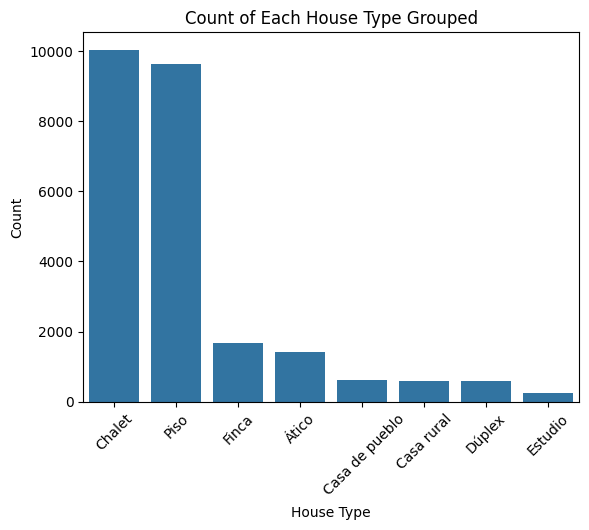

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df_clean, x='house_type_grouped', order=df_clean['house_type_grouped'].value_counts().index)
plt.title('Count of Each House Type Grouped')
plt.xlabel('House Type')
plt.ylabel('Count')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

This bar chart shows the count of different house types grouped in the Balearic Islands. The majority of properties are classified as “Chalet” and “Piso”, while other types like “Finca”, “Ático” and “Casa de pueblo” have significantly fewer listings. This indicates a higher availability of Chalets and Pisos in the housing market.

Now we will at the 'loc_city' variable.



In [24]:
city_counts=df_clean["loc_city"].value_counts()
city_counts_df = city_counts.reset_index()
city_counts_df.columns = ['City', 'Count']

# Display all rows
pd.set_option('display.max_rows', None)
print(city_counts_df)

                          City  Count
0            Palma de Mallorca   6538
1                       Calvià   2297
2                    Llucmajor   1777
3                      Eivissa   1076
4        Santa Eulalia del Río    987
5      Sant Josep de Sa Talaia    946
6                      Manacor    824
7                     Marratxi    770
8                    Maó/Mahon    569
9                         Inca    555
10                    Felanitx    404
11             Santa Margalida    365
12                  Sant Lluis    358
13                 Es Mercadal    342
14                    Pollença    329
15                  Pobla (Sa)    306
16                      Campos    303
17                       Selva    292
18                        Muro    278
19     Sant Antoni de Portmany    277
20                      Alaior    254
21          Puerto de Pollença    249
22                   Sencelles    221
23                    Esporles    211
24                      Soller    193
25          

There are 73 towns villages and cities. Palma is the city with the most observations (6538) while some smaller viallages like Escorca or Son Carrio has as few as 12 observations.

To finish cleaning and understandind the data structure, we will look at the 'loc_zone' variable.

In [38]:
print(df_clean["loc_zone"].value_counts())

loc_zone
Mallorca, Balears (Illes)    19649
Ibiza, Balears (Illes)        3422
Menorca, Balears (Illes)      1651
Balears (Illes)                100
Name: count, dtype: int64


We see that most houses are in Mallorca, followed by Ibiza and Menorca. Let's take a closer look at those labeled with 'Balears (Illes)'.

In [39]:
balears_illes_houses = df_clean[df_clean['loc_zone'] == 'Balears (Illes)']
balears_illes_loc_full = balears_illes_houses['loc_full']
print(balears_illes_loc_full)

5073                      , Formentera , Balears (Illes) 
5074     Calle de s'Aigua Dolça, 26 , Formentera , Bal...
5075                      , Formentera , Balears (Illes) 
5076                      , Formentera , Balears (Illes) 
5077     Avenida Pilar de la Mola, 95 , Formentera , B...
5078     Calle morel, 7 , Urb. Formentera ( Baleari) ,...
5079                      , Formentera , Balears (Illes) 
5080     Avenida Miramar, 31 , Urb. francisco borras ,...
5081     Calle des Pla del Rei, 111 , Urb. Edificio s'...
5082        Es Pujols s/n , Formentera , Balears (Illes) 
5083     Calle de s'Almadrava s/n , Formentera , Balea...
5084     Venda de Sa Punta, 3555 , Formentera , Balear...
5085     Lugar Venda des Cap, 452 , Formentera , Balea...
5086     Calle de sa Talaissa s/n , Formentera , Balea...
5087                      , Formentera , Balears (Illes) 
5088                      , Formentera , Balears (Illes) 
5089     Calle de Mallorca, 2 , Formentera , Balears (...
5090     Camin

We can see that all the houses labeled with 'Balears (Illes)' are in Formentera, so we will change the label to 'Formentera'

In [40]:
# Add the new category 'Formentera' to the 'loc_zone' column
df_clean['loc_zone'] = df_clean['loc_zone'].cat.add_categories('Formentera')

# Now you should be able to assign the new category
df_clean.loc[df_clean['loc_zone'] == 'Balears (Illes)', 'loc_zone'] = 'Formentera'

# Remove the category 'Balears (Illes)'
df_clean['loc_zone'] = df_clean['loc_zone'].cat.remove_categories('Balears (Illes)')

print(df_clean["loc_zone"].value_counts())

loc_zone
Mallorca, Balears (Illes)    19649
Ibiza, Balears (Illes)        3422
Menorca, Balears (Illes)      1651
Formentera                     100
Name: count, dtype: int64
